In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("cleaned_sales_data.csv")
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12,2019
...,...,...,...,...,...,...,...,...,...,...,...
536345,536548,2018-12-01,22168,Organiser Wood Antique White,18.96,2,12472.0,Germany,-37.92,12,2018
536346,536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,3,12472.0,Germany,-42.27,12,2018
536347,536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,1,12472.0,Germany,-11.74,12,2018
536348,536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,4,12472.0,Germany,-65.40,12,2018


In [3]:
# Count the number of unique products in each transaction
products_per_transaction = df.groupby('TransactionNo')['ProductNo'].nunique().reset_index(name='NumProducts')

# Display the result
products_per_transaction.head(10)

,TransactionNo,NumProducts
0,536365,7
1,536366,2
2,536367,12
3,536368,4
4,536369,1
5,536370,19
6,536371,1
7,536372,2
8,536373,16
9,536374,1


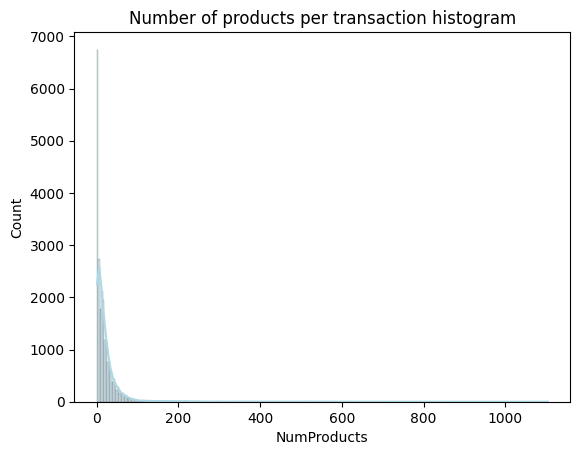

In [7]:
sns.histplot(data=products_per_transaction, x='NumProducts', color="lightblue", kde=True)
plt.title('Number of products per transaction histogram')
plt.show()

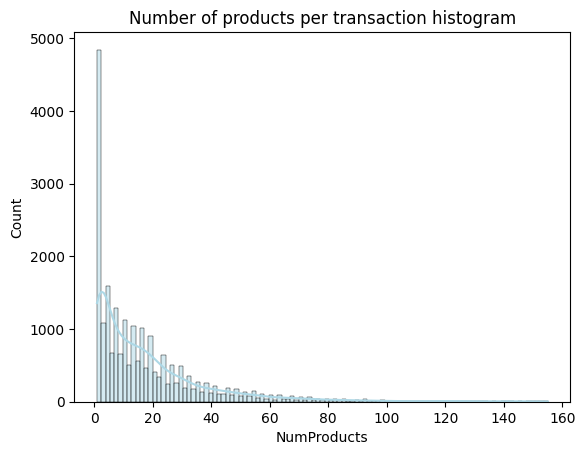

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for NumProducts
z_scores = zscore(products_per_transaction['NumProducts'])

# Filter out rows where the absolute z-score is greater than 3 (common threshold for outliers)
filtered_products_per_transaction = products_per_transaction[np.abs(z_scores) < 3]

# Plot the filtered data
sns.histplot(data=filtered_products_per_transaction, x='NumProducts', color="lightblue", kde=True)
plt.title('Number of products per transaction histogram(Outliers Removed)')
plt.show()

In [3]:
import pandas as pd

# Group by TransactionNo and sum the quantities for each transaction
top_transactions = df.groupby('TransactionNo')['Quantity'].sum() \
                     .sort_values(ascending=False) \
                     .head(10) \
                     .reset_index()

# Display the result
print("Top 10 Transactions by Total Quantity:")
print(top_transactions.to_string(index=False))

# Optional: Merge with original data to get additional details (like Date, CustomerNo, etc.)
top_transactions_details = pd.merge(
    top_transactions,
    df[['TransactionNo', 'Date', 'CustomerNo', 'Country']].drop_duplicates(),
    on='TransactionNo',
    how='left'
)

print("\nWith additional details:")
print(top_transactions_details.to_string(index=False))

Top 10 Transactions by Total Quantity:
 TransactionNo  Quantity
        581484     80995
        581483     80995
        541433     74215
        541431     74215
        556917     15049
        563076     14730
        574941     14149
        576365     13956
        572035     13392
        567423     12572

With additional details:
 TransactionNo  Quantity       Date  CustomerNo        Country
        581484     80995 2019-12-09     16446.0 United Kingdom
        581483     80995 2019-12-09     16446.0 United Kingdom
        541433     74215 2019-01-18     12346.0 United Kingdom
        541431     74215 2019-01-18     12346.0 United Kingdom
        556917     15049 2019-06-15     12415.0      Australia
        563076     14730 2019-08-11     14646.0    Netherlands
        574941     14149 2019-11-07     15941.0 United Kingdom
        576365     13956 2019-11-14     14365.0 United Kingdom
        572035     13392 2019-10-20     14646.0    Netherlands
        567423     12572 2019-

C:\Users\acer\AppData\Local\Temp\ipykernel_23948\1895599977.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


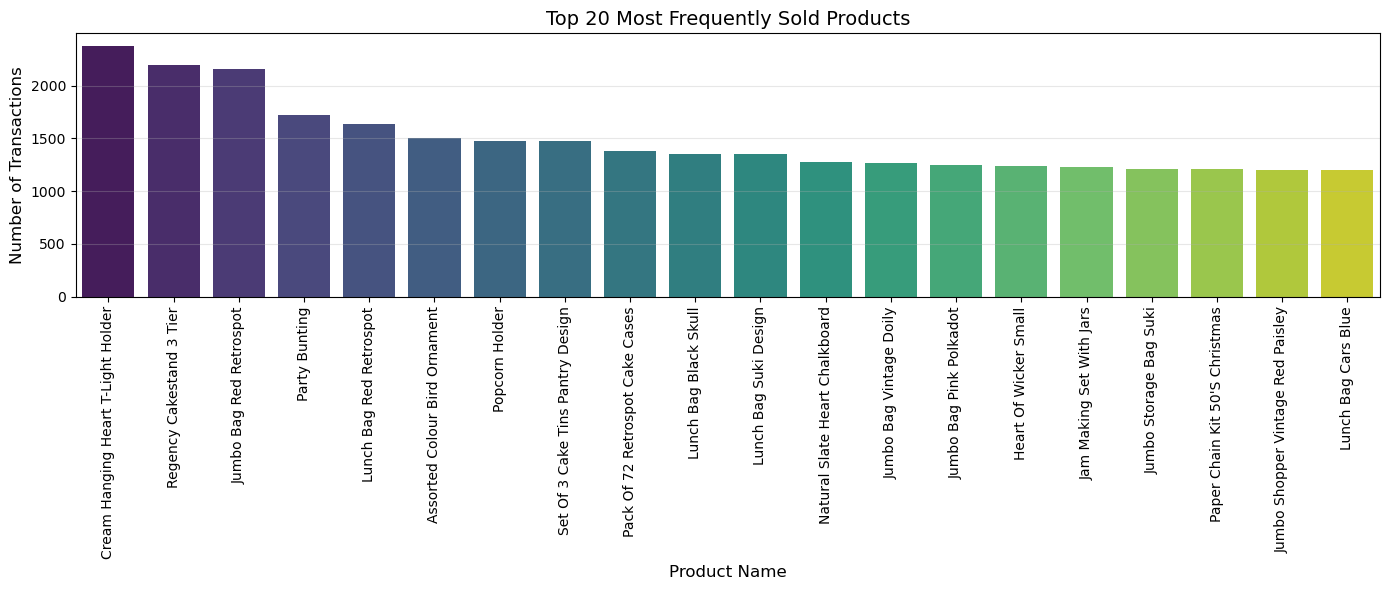

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 20 most frequently sold products
top_products = df['ProductName'].value_counts().head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 20 Most Frequently Sold Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

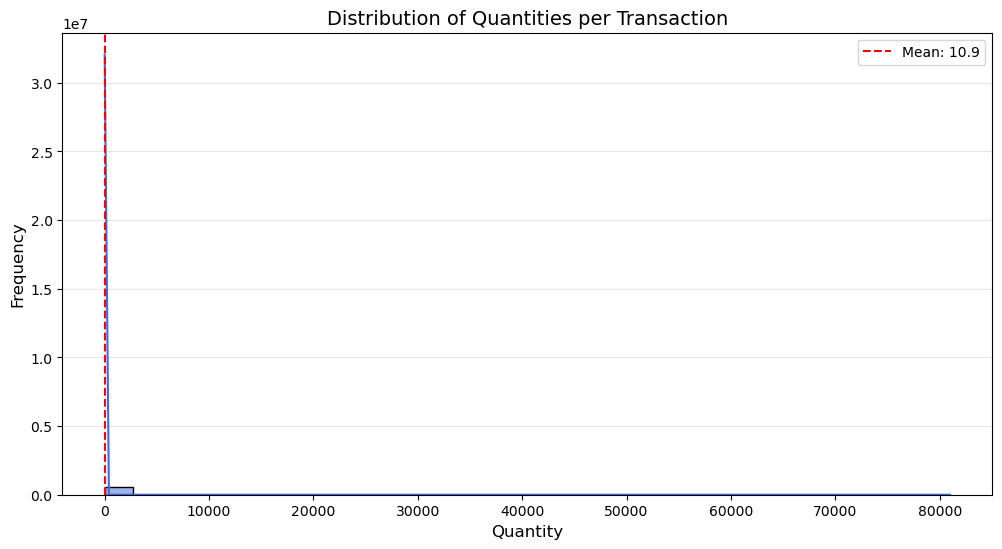

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Quantity'], bins=30, kde=True, color='royalblue')

plt.title('Distribution of Quantities per Transaction', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add vertical line at mean
mean_qty = df['Quantity'].mean()
plt.axvline(mean_qty, color='red', linestyle='--', 
            label=f'Mean: {mean_qty:.1f}')
plt.legend()

plt.show()

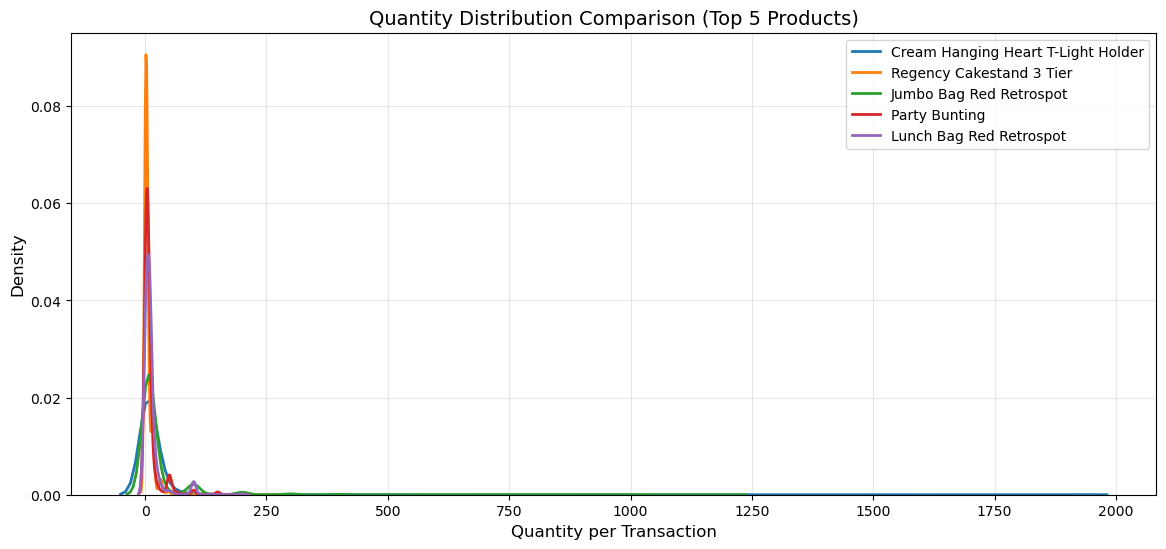

In [6]:
top5_products = df['ProductName'].value_counts().head(5).index

plt.figure(figsize=(14, 6))
for product in top5_products:
    subset = df[df['ProductName'] == product]
    sns.kdeplot(subset['Quantity'], label=product, linewidth=2)

plt.title('Quantity Distribution Comparison (Top 5 Products)', fontsize=14)
plt.xlabel('Quantity per Transaction', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

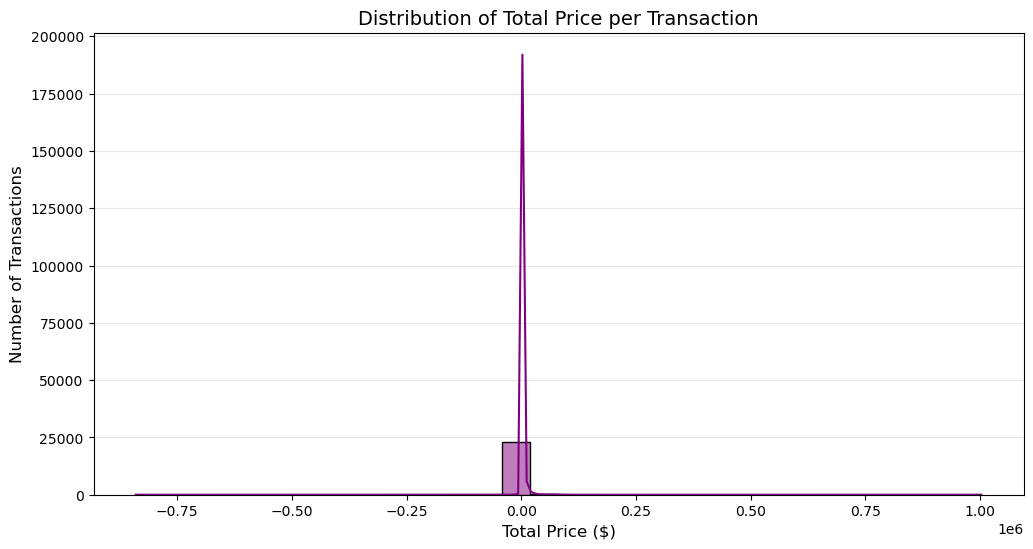

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total price per transaction
transaction_totals = df.groupby('TransactionNo')['TotalMoney'].sum()

plt.figure(figsize=(12, 6))
sns.histplot(transaction_totals, bins=30, kde=True, color='purple')

plt.title('Distribution of Total Price per Transaction', fontsize=14)
plt.xlabel('Total Price ($)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

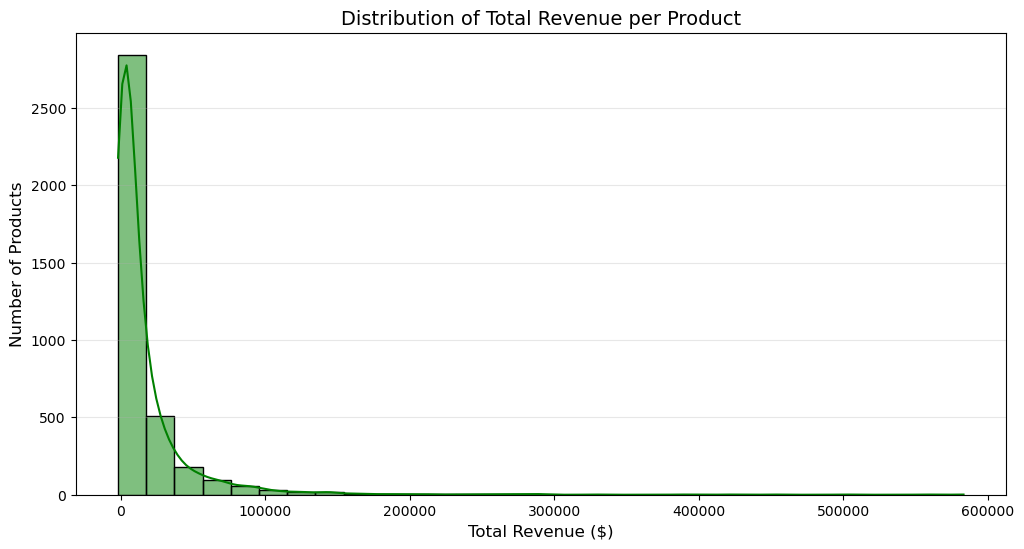

In [8]:
# Calculate total sales per product
product_totals = df.groupby('ProductName')['TotalMoney'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.histplot(product_totals, bins=30, kde=True, color='green')

plt.title('Distribution of Total Revenue per Product', fontsize=14)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()